In [123]:
#read the data and extract the country list (formatting the date)

import pandas as pd
from datetime import datetime
import sys
import numpy as np

data = pd.read_csv('Supply_Chain_Shipment_Pricing_Data.csv')
data['delivered to client date'] = data['delivered to client date'].map(lambda x: datetime.strptime( x , '%d-%b-%y'))
countries = list(data['country'].drop_duplicates())
countries.sort()
print(str(len(data)))

10324


In [129]:
# extract a variable (time series) per country (sort by date)
# the possible measure are : unit of measure per pack, line item quantity, line item value, pack_price, unit price
 
maxV=0
minV=sys.float_info.max
list_countries=[]


for country in countries:
    dataForCountry = data[data['country'] == country]
    dataForCountry = dataForCountry.sort_values(by=['delivered to client date'])
    
    numberSamples = len(dataForCountry)

    if numberSamples >= 500:
        maxV = max(maxV,numberSamples)
        minV = min(minV,numberSamples)

        print("unit price for: "+country+ " length: "+str(numberSamples))
        #print(dataForCountry['delivered to client date'])
        list_countries.append(country)
    else:
        data = data.drop(data[data['country'] == country].index)
        #print("country removed:", country)
    
 
print("max # samples: "+str(maxV))
print("minV # samples: "+str(minV))
print(str(len(data)))
print(country)
print(list_countries)

unit price for: Côte d'Ivoire length: 1083
unit price for: Haiti length: 655
unit price for: Mozambique length: 631
unit price for: Nigeria length: 1194
unit price for: South Africa length: 1406
unit price for: Tanzania length: 519
unit price for: Uganda length: 779
unit price for: Vietnam length: 688
unit price for: Zambia length: 683
unit price for: Zimbabwe length: 538
max # samples: 1406
minV # samples: 519
8176
Zimbabwe
["Côte d'Ivoire", 'Haiti', 'Mozambique', 'Nigeria', 'South Africa', 'Tanzania', 'Uganda', 'Vietnam', 'Zambia', 'Zimbabwe']


In [131]:
import matplotlib.pyplot as plt

from itertools import permutations

'''
for country in list_countries:
    print(data[data['country']==country]['unit price'])
    plt.plot(data[data['country']==country]['unit price'])
'''

test= data[data['country']=="Zimbabwe"]['unit price']
time=data[data['country']=="Zimbabwe"]['delivered to client date']


#plt.plot(time, test, 'o',linestyle='')
#plt.xlim([0,1000])
#print(test)
#print(time)


countriesPermutations = list(permutations(list_countries,2))
print(len(countriesPermutations))

num_var=[]
min_len_list=[]

#countriesPermutations=[('Zimbabwe', 'Nigeria', 'Mozambique', 'Haiti', 'Vietnam'),]

for permCountries in countriesPermutations:
    print(permCountries)

    
    minlen=100000

    currentInters=list(set(data[data['country']==permCountries[0]]['delivered to client date']))
    commontstamps=None
    var=0
    

    for i in range(1,len(permCountries)):
        currentIntersComp=intersect(currentInters,list(set(data[data['country']==permCountries[i]]['delivered to client date'])))
        
        #if len(currentIntersComp)>0:
        currentInters = currentIntersComp
        minlen=min(len(currentInters), minlen)
        print("intermediate: ", minlen)
        var+=1
        if len(currentInters)==minlen:
            commontstamps=currentInters
    num_var.append(var)
    min_len_list.append(minlen)

#print(max(num_var))
#print(num_var.index(max(num_var)))


#print(min_len_list)
print(max(min_len_list))
print(min_len_list.index(max(min_len_list)))
   # commontstamps.sort()
   # print(commontstamps)
    
'''
variables=np.array((len(list_countries),len(common)))

for i in range(len(countries)):
    dfcountry=data[data['country']==list_countries[i]]
    dfIntersect=dfcountry[dfcountry['delivered to client date'].isin(commontstamps)]['delivered to client date']
    if len(dfIntersect) > 0:
        variables[i]=np.array(dfIntersect.tolist())

'''

90
("Côte d'Ivoire", 'Haiti')
intermediate:  48
("Côte d'Ivoire", 'Mozambique')
intermediate:  46
("Côte d'Ivoire", 'Nigeria')
intermediate:  75
("Côte d'Ivoire", 'South Africa')
intermediate:  46
("Côte d'Ivoire", 'Tanzania')
intermediate:  50
("Côte d'Ivoire", 'Uganda')
intermediate:  67
("Côte d'Ivoire", 'Vietnam')
intermediate:  68
("Côte d'Ivoire", 'Zambia')
intermediate:  65
("Côte d'Ivoire", 'Zimbabwe')
intermediate:  27
('Haiti', "Côte d'Ivoire")
intermediate:  48
('Haiti', 'Mozambique')
intermediate:  37
('Haiti', 'Nigeria')
intermediate:  48
('Haiti', 'South Africa')
intermediate:  35
('Haiti', 'Tanzania')
intermediate:  28
('Haiti', 'Uganda')
intermediate:  54
('Haiti', 'Vietnam')
intermediate:  41
('Haiti', 'Zambia')
intermediate:  38
('Haiti', 'Zimbabwe')
intermediate:  23
('Mozambique', "Côte d'Ivoire")
intermediate:  46
('Mozambique', 'Haiti')
intermediate:  37
('Mozambique', 'Nigeria')
intermediate:  39
('Mozambique', 'South Africa')
intermediate:  28
('Mozambique', 'Ta

"\nvariables=np.array((len(list_countries),len(common)))\n\nfor i in range(len(countries)):\n    dfcountry=data[data['country']==list_countries[i]]\n    dfIntersect=dfcountry[dfcountry['delivered to client date'].isin(commontstamps)]['delivered to client date']\n    if len(dfIntersect) > 0:\n        variables[i]=np.array(dfIntersect.tolist())\n\n"

In [128]:
def intersect(dates1, dates2):
    intersection=[]
    for time1 in dates1:
        for time2 in dates2:
            if time1==time2:
                intersection.append(time1)
                
    return intersection
    

Côte d'Ivoire 
nb of samples= 1083
Haiti 
nb of samples= 655
Mozambique 
nb of samples= 631
Nigeria 
nb of samples= 1194
South Africa 
nb of samples= 1406
Tanzania 
nb of samples= 519
Uganda 
nb of samples= 779
Vietnam 
nb of samples= 688
Zambia 
nb of samples= 683
Zimbabwe 
nb of samples= 538
2015-08-20 00:00:00
2007-01-24 00:00:00


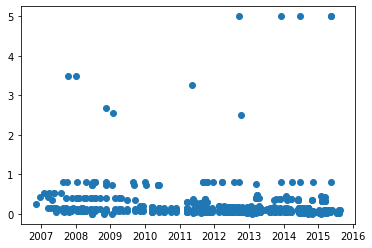

In [126]:
test= data[data['country']=="Zimbabwe"]['unit price']
time=data[data['country']=="Zimbabwe"]['delivered to client date']

plt.plot(time, test, 'o',linestyle='')
#plt.xlim([0,1000])
#print(test)
#print(time)
min_tslist=[]
max_tslist=[]

for country in list_countries:
    timestamps=data[data['country']==country]['delivered to client date']
    print(country,"\nnb of samples=",len(timestamps))
    min_tslist.append(min(timestamps))
    max_tslist.append(max(timestamps))
    #print(max(timestamps))
    #print(min(timestamps))

print(min(max_tslist))
print(max(min_tslist))



Uganda
103-UG-T30
Nigeria
133-NG-T01
Uganda
900-UG-T30
South Africa
116-ZA-T30
Zimbabwe
113-ZW-T30
Zambia
110-ZM-T01
Nigeria
131-NG-T01
Tanzania
109-TZ-T01
Nigeria
112-NG-T01
Uganda
201-UG-T30
Côte d'Ivoire
100-CI-T01
Zimbabwe
100-ZW-T30
Nigeria
151-NG-T30
Lamivudine/Nevirapine/Zidovudine 150/200/300mg, tablets, 60 Tabs
df4       delivered to client date  unit price
1424                2009-12-18        0.19
6608                2010-03-31        0.19
6630                2010-06-28        0.19
6631                2010-06-28        0.19
6650                2010-08-17        0.19
...                        ...         ...
10189               2013-09-12        0.14
10224               2014-02-10        0.14
10234               2014-04-17        0.14
10251               2014-05-09        0.14
10283               2014-12-29        0.13

[130 rows x 2 columns]
Uganda
200-UG-T30
Uganda
102-UG-T30
Nigeria
153-NG-T01
Haiti
122-HT-T30
Zambia
A01-ZM-T50
Zambia
100-ZM-T30
Tanzania
109-TZ-T30
Zimbab

'\nfor country in list_countries:\n    df=data[data[\'country\']==country]\n    dat= df[df[\'delivered to client date\'].between("2007-01-24","2015-08-20")][\'delivered to client date\']\n    print(dat)\n    plt.figure()\n    plt.plot(dat)\n    break\n'

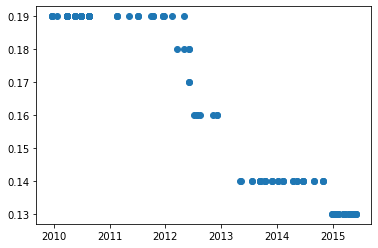

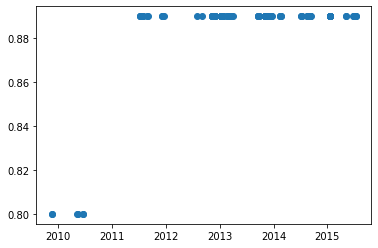

In [56]:
a=data[data['delivered to client date'].between("2007-01-24","2015-08-20")]['delivered to client date']

projects=set(data["project code"])


for i in projects:
    for country in list_countries:
        b=data[data["country"]==country]['project code']    
        if i in list(b):
            print(country)
            print(i)
            df=data[data["project code"]== i]
            #print("df",df)
            df2=df[df["country"]==country]
            df3=df2[['delivered to client date','unit price','item description']]
            item=set(df3['item description'])
            for j in item:
                
                #df4=df3.sort_values('delivered to client date')
                df4=df3[df3["item description"]==j][['delivered to client date','unit price']]
                
                if len(df4)>=100:
                    print(j)
                    print("df4",df4)
                    plt.figure()
                    plt.plot(df4['delivered to client date'],df4['unit price'],'o')



   

'''
for country in list_countries:
    df=data[data['country']==country]
    dat= df[df['delivered to client date'].between("2007-01-24","2015-08-20")]['delivered to client date']
    print(dat)
    plt.figure()
    plt.plot(dat)
    break
'''

Nigeria
75
75
41
40


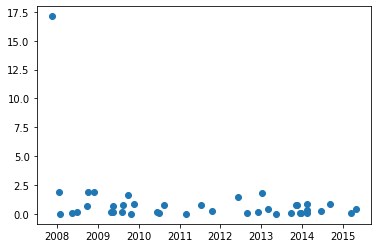

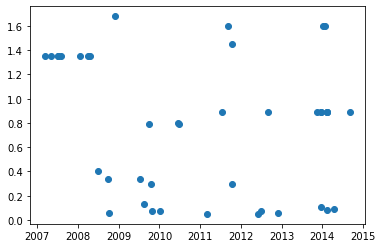

In [160]:
finallist=["Côte d'Ivoire","Nigeria"]

commonstamps=[]
minlen=100000

inters=list(set(data[data['country']==list_countries[0]]['delivered to client date']))
#print(inters)

for i in range(1,len(list_countries)):
    print(list_countries[i])
    inters=intersect(inters,list(set(data[data['country']==list_countries[i]]['delivered to client date'])))
    print(len(inters))
    minlen=min(len(inters), minlen)
    if(len(inters)==minlen):
        commonstamps=inters
        print(len(inters))


finaldata=data[data["country"].isin(list_countries)][["country","delivered to client date", "unit price"]]
finaldata=finaldata[finaldata["delivered to client date"].isin(commonstamps)][["country","delivered to client date", "unit price"]]


for country in finallist:
    stamps=[]
    for i in finaldata[finaldata["country"]==country]["delivered to client date"]:
        if i not in stamps :
            stamps.append(i)
        else:
            finaldata=finaldata.drop(finaldata[(finaldata["country"]==country) & (finaldata["delivered to client date"]==i)].index)
    plt.figure()
    plt.plot(finaldata[finaldata["country"]==country]["delivered to client date"],finaldata[finaldata["country"]==country]["unit price"],'o')

    

    
    
print(len(finaldata[finaldata['country']=="Nigeria"]["delivered to client date"]))
print(len(finaldata[finaldata['country']=="Côte d'Ivoire"]["delivered to client date"]))
    